In [0]:
!wget https://urbanlytics24.s3-ap-southeast-1.amazonaws.com/air_sensor.json

--2019-09-22 02:15:30--  https://urbanlytics24.s3-ap-southeast-1.amazonaws.com/air_sensor.json
Resolving urbanlytics24.s3-ap-southeast-1.amazonaws.com (urbanlytics24.s3-ap-southeast-1.amazonaws.com)... 52.219.40.23
Connecting to urbanlytics24.s3-ap-southeast-1.amazonaws.com (urbanlytics24.s3-ap-southeast-1.amazonaws.com)|52.219.40.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18323790 (17M) [application/json]
Saving to: ‘air_sensor.json’

air_sensor.json     100%[===================>]  17.47M  4.95MB/s    in 3.5s    

2019-09-22 02:15:35 (4.95 MB/s) - ‘air_sensor.json’ saved [18323790/18323790]



In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_json('air_sensor.json', orient='records').sort_values(by=['CreatedDateTime', 'DeviceId'], ascending=False)
df.head()
df.tail()


,CreatedDateTime,DeviceDataTypeId,DeviceId,DisplayName,FabrickName,Name,Status,Unit,Value,_id
1,1558483274,6,96,temperature,temperature,temperature,Warning,Â°C,29.14,{'$oid': '5ce4917e31b72844b7141433'}
11112,1558483274,4,96,humidity,humidity,humidity,Danger,%RH,77.68,{'$oid': '5ce4917e31b72844b7141437'}
22223,1558483274,93,96,heatIndex,heatIndex,heatIndex,Extreme_Caution,Â°C,34.62,{'$oid': '5ce4917e31b72844b714143b'}
33334,1558483274,5,96,pm25,pm25,pm25,Normal,ug/m3,36.00,{'$oid': '5ce4917e31b72844b714143f'}
44445,1558483274,97,96,RSSI,RSSI,RSSI,None,None,-122.20,{'$oid': '5ce4917e31b72844b7141443'}


In [0]:
df.describe()

,CreatedDateTime,DeviceDataTypeId,DeviceId,Value
count,8.206900e+04,82069.000000,82069.0,82069.000000
mean,1.560468e+09,34.664075,96.0,6.331608
std,9.565756e+05,42.686754,0.0,60.488673
min,1.558483e+09,3.000000,96.0,-138.000000
25%,1.559844e+09,4.000000,96.0,3.000000
50%,1.560597e+09,5.000000,96.0,28.630000
75%,1.561256e+09,93.000000,96.0,37.250000
max,1.561939e+09,97.000000,96.0,83.790000


Text(0.5, 1.0, 'Unit')

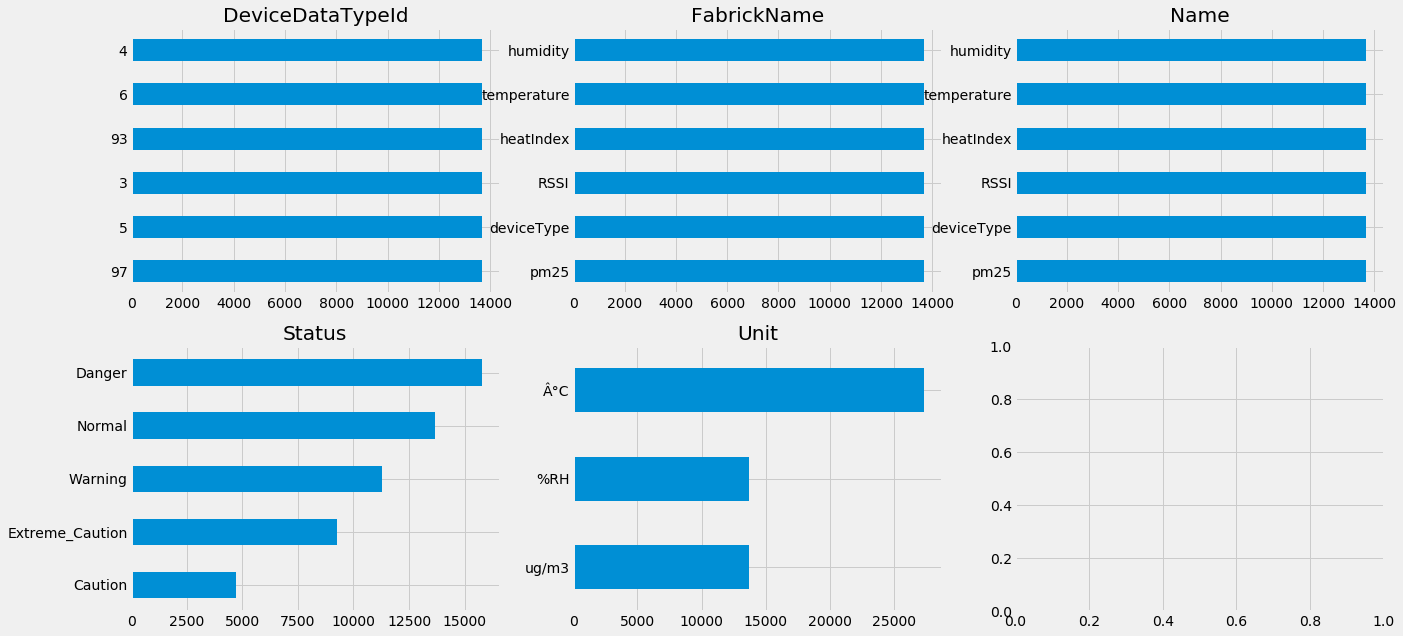

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

df.DeviceDataTypeId.value_counts().sort_values().plot(kind = 'barh', ax=axes[0,0]).set_title('DeviceDataTypeId')
df.FabrickName.value_counts().sort_values().plot(kind = 'barh', ax=axes[0,1]).set_title('FabrickName')
df.Name.value_counts().sort_values().plot(kind = 'barh', ax=axes[0,2]).set_title('Name')
df.Status.value_counts().sort_values().plot(kind = 'barh', ax=axes[1,0]).set_title('Status')
df.Unit.value_counts().sort_values().plot(kind = 'barh', ax=axes[1,1]).set_title('Unit')
#df.Value.plot(kind = 'barh', ax=axes[1,1]).set_title('Value')


In [0]:
df.DeviceDataTypeId.value_counts()

4     13683
6     13680
93    13678
97    13676
5     13676
3     13676
Name: DeviceDataTypeId, dtype: int64

In [0]:
df['time'] = pd.to_datetime(df['CreatedDateTime'],unit='s')
df.head()
df.tail()

,CreatedDateTime,DeviceDataTypeId,DeviceId,DisplayName,FabrickName,Name,Status,Unit,Value,_id,time
1,1558483274,6,96,temperature,temperature,temperature,Warning,Â°C,29.14,{'$oid': '5ce4917e31b72844b7141433'},2019-05-22 00:01:14
11112,1558483274,4,96,humidity,humidity,humidity,Danger,%RH,77.68,{'$oid': '5ce4917e31b72844b7141437'},2019-05-22 00:01:14
22223,1558483274,93,96,heatIndex,heatIndex,heatIndex,Extreme_Caution,Â°C,34.62,{'$oid': '5ce4917e31b72844b714143b'},2019-05-22 00:01:14
33334,1558483274,5,96,pm25,pm25,pm25,Normal,ug/m3,36.00,{'$oid': '5ce4917e31b72844b714143f'},2019-05-22 00:01:14
44445,1558483274,97,96,RSSI,RSSI,RSSI,None,None,-122.20,{'$oid': '5ce4917e31b72844b7141443'},2019-05-22 00:01:14


In [0]:
dx = pd.DataFrame(np.nan, index=df.CreatedDateTime.unique(),columns=df.Name.unique(), dtype='float')

for i, row in df.iterrows():
  dx.loc[row.CreatedDateTime, row.Name] = row.Value
  if not isinstance(row.Value, float):
    print(row.CreatedDateTime, row.Name, row.Value, type(row.Value))

In [0]:
dx.head()

,deviceType,temperature,humidity,heatIndex,pm25,RSSI
1561939091,3.0,29.16,76.79,34.48,30.0,-101.2
1561938974,3.0,29.21,76.72,34.59,30.0,-111.5
1561938857,3.0,29.25,76.38,34.62,28.0,-119.0
1561938740,3.0,29.30,75.94,34.66,30.0,-120.0
1561938623,3.0,29.59,75.27,35.26,31.0,-119.8


In [0]:
dx.describe()

,deviceType,temperature,humidity,heatIndex,pm25,RSSI
count,13676.0,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000
mean,3.0,31.342093,69.774387,38.232639,15.603100,-120.008241
std,0.0,2.547452,8.000302,4.476555,9.094393,7.327862
min,3.0,26.690000,44.800000,28.830000,0.000000,-138.000000
25%,3.0,29.340000,63.800000,34.680000,8.000000,-124.800000
50%,3.0,30.580000,71.910000,37.120000,15.000000,-120.000000
75%,3.0,33.270000,76.070000,41.862500,23.000000,-115.500000
max,3.0,38.260000,83.790000,50.380000,66.000000,-88.800000


In [0]:
dx.temperature = dx.temperature.astype('float64')
dx.humidity = dx.humidity.astype('float64')
dx.heatIndex = dx.heatIndex.astype('float64')
dx.pm25 = dx.pm25.astype('float64')
dx.deviceType = dx.deviceType.astype('float64')
dx.to_hdf('matrix.h5', key='dx', mode='w')

In [0]:
dx.describe()

,deviceType,temperature,humidity,heatIndex,pm25,RSSI
count,13676.0,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000
mean,3.0,31.342093,69.774387,38.232639,15.603100,-120.008241
std,0.0,2.547452,8.000302,4.476555,9.094393,7.327862
min,3.0,26.690000,44.800000,28.830000,0.000000,-138.000000
25%,3.0,29.340000,63.800000,34.680000,8.000000,-124.800000
50%,3.0,30.580000,71.910000,37.120000,15.000000,-120.000000
75%,3.0,33.270000,76.070000,41.862500,23.000000,-115.500000
max,3.0,38.260000,83.790000,50.380000,66.000000,-88.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e9b787080>,
      dtype=object)

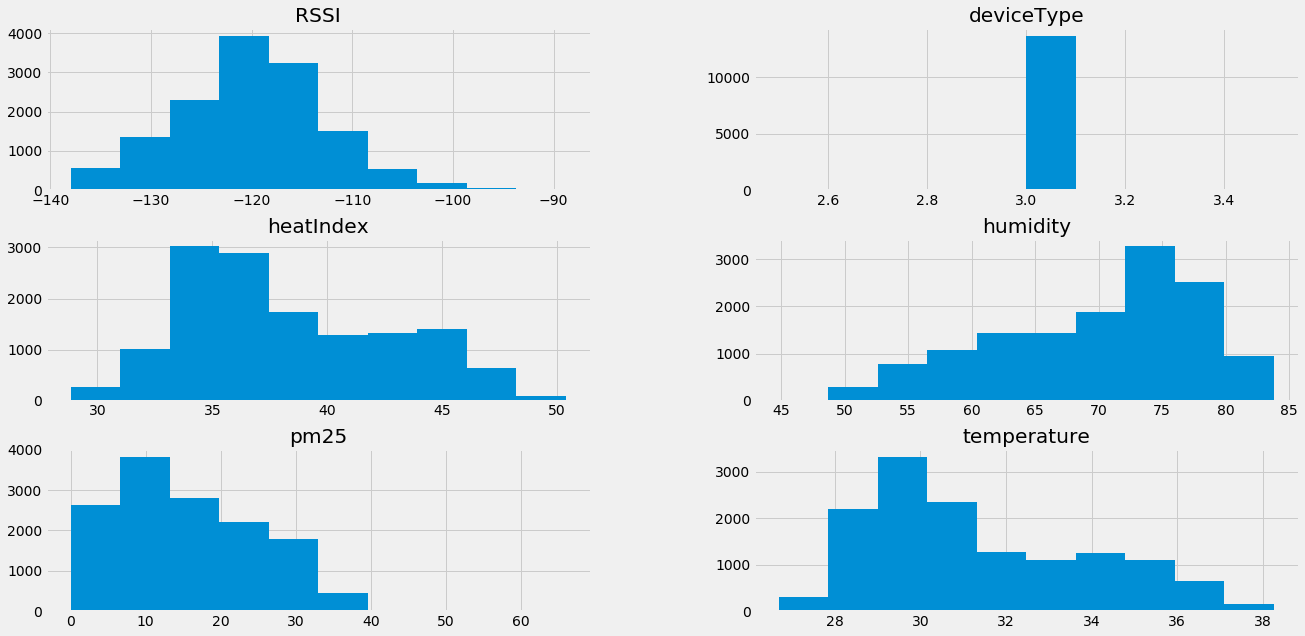

In [0]:
dx.hist(bins=10, figsize=(20,10))


In [0]:
dx.index = pd.to_datetime(dx.index,unit='s')
dx['timestamp'] = dx.index
dx = dx.sort_index()
dx.head()

,deviceType,temperature,humidity,heatIndex,pm25,RSSI,timestamp
2019-05-22 00:01:14,3.0,29.14,77.68,34.62,36.0,-122.2,2019-05-22 00:01:14
2019-05-22 00:09:02,3.0,29.34,76.64,34.92,35.0,-122.8,2019-05-22 00:09:02
2019-05-22 00:09:03,3.0,29.34,76.64,34.92,35.0,-133.0,2019-05-22 00:09:03
2019-05-22 00:10:59,3.0,29.33,77.00,34.97,35.0,-119.0,2019-05-22 00:10:59
2019-05-22 00:12:56,3.0,29.35,76.51,34.92,35.0,-110.2,2019-05-22 00:12:56


In [0]:
!pip install fbprophet

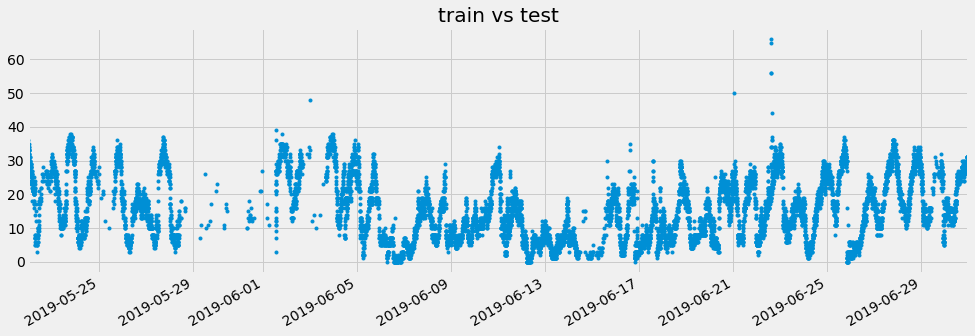

In [0]:
_ = dx['pm25'].plot(figsize=(15,5), title='train vs test', style='.')

In [0]:
dx['hour'] = dx['timestamp'].dt.hour
dx['dayofweek'] = dx['timestamp'].dt.dayofweek
dx['quarter'] = dx['timestamp'].dt.quarter
dx['month'] = dx['timestamp'].dt.month
dx['year'] = dx['timestamp'].dt.year
dx['dayofyear'] = dx['timestamp'].dt.dayofyear
dx['dayofmonth'] = dx['timestamp'].dt.day
dx['weekofyear'] = dx['timestamp'].dt.weekofyear

split_date = '23-Jun-2019'
dx_train = dx.loc[dx.index <= split_date].copy()
dx_test = dx.loc[dx.index > split_date].copy()
dx_train.head()
dx_train.tail()

cols = [x for x in dx.columns.tolist() if x != 'pm25' and x != 'timestamp']


X_train, y_train = dx_train[cols], dx_train[['pm25']]
X_test, y_test = dx_test[cols], dx_test[['pm25']]
X_train.head()

,deviceType,temperature,humidity,heatIndex,RSSI,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
2019-05-22 00:01:14,3.0,29.14,77.68,34.62,-122.2,0,2,2,5,2019,142,22,21
2019-05-22 00:09:02,3.0,29.34,76.64,34.92,-122.8,0,2,2,5,2019,142,22,21
2019-05-22 00:09:03,3.0,29.34,76.64,34.92,-133.0,0,2,2,5,2019,142,22,21
2019-05-22 00:10:59,3.0,29.33,77.00,34.97,-119.0,0,2,2,5,2019,142,22,21
2019-05-22 00:12:56,3.0,29.35,76.51,34.92,-110.2,0,2,2,5,2019,142,22,21


In [0]:

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50) # Change verbose to True if you want to see it train

[02:16:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15.269	validation_1-rmse:18.6479
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:13.9842	validation_1-rmse:17.5805
[2]	validation_0-rmse:12.8447	validation_1-rmse:16.7134
[3]	validation_0-rmse:11.8397	validation_1-rmse:15.9472
[4]	validation_0-rmse:10.9355	validation_1-rmse:14.8842
[5]	validation_0-rmse:10.1488	validation_1-rmse:14.1375
[6]	validation_0-rmse:9.44115	validation_1-rmse:13.312
[7]	validation_0-rmse:8.82908	validation_1-rmse:12.6052
[8]	validation_0-rmse:8.29076	validation_1-rmse:12.151
[9]	validation_0-rmse:7.7945	validation_1-rmse:11.7506
[10]	validation_0-rmse:7.37824	validation_1-rmse:11.3992
[11]	validation_0-rmse:6.99537	validation_1-rmse:11.0096
[12]	validation_0-rmse:6.66768	validation_1-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

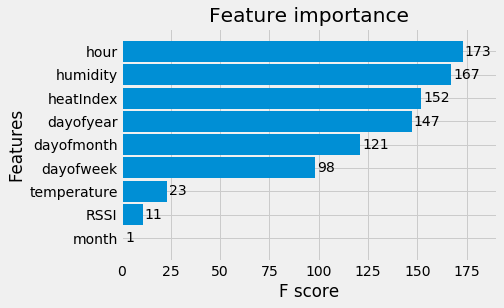

In [0]:
_ = plot_importance(reg, height=0.9)


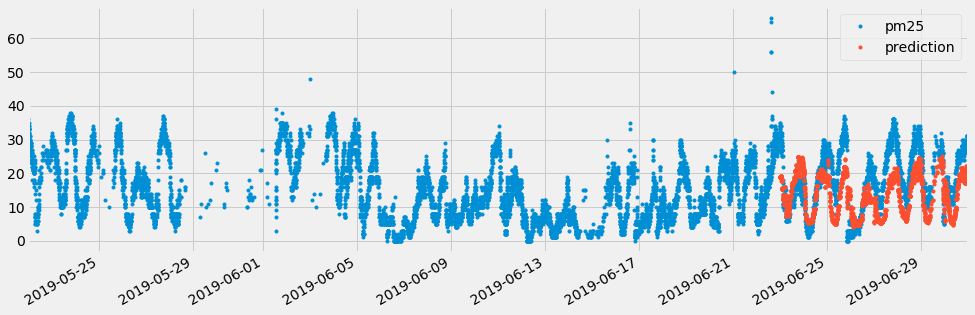

In [0]:
dx_test['prediction'] = reg.predict(X_test)
dx_all = pd.concat([dx_test, dx_train], sort=False)
_ = dx_all[['pm25','prediction']].plot(figsize=(15, 5), style='.')


In [0]:
print("mean_squared_error", mean_squared_error(y_true=dx_test['pm25'],
                   y_pred=dx_test['prediction']))
mean_absolute_error(y_true=dx_test['pm25'],
                   y_pred=dx_test['prediction'])
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=dx_test['pm25'],
                   y_pred=dx_test['prediction'])

mean_squared_error 60.09543347580194


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


inf

In [0]:
xlf = xgb.XGBRegressor(seed=1729)
xlf.fit(X_train, y_train, eval_metric='rmse', eval_set = [(X_test, y_test)])


[02:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:18.6479
[1]	validation_0-rmse:17.5805
[2]	validation_0-rmse:16.7134
[3]	validation_0-rmse:15.9472
[4]	validation_0-rmse:14.8842
[5]	validation_0-rmse:14.1375
[6]	validation_0-rmse:13.312
[7]	validation_0-rmse:12.6052
[8]	validation_0-rmse:12.151
[9]	validation_0-rmse:11.7506
[10]	validation_0-rmse:11.3992
[11]	validation_0-rmse:11.0096
[12]	validation_0-rmse:10.5978
[13]	validation_0-rmse:10.3493
[14]	validation_0-rmse:10.1326
[15]	validation_0-rmse:9.77612
[16]	validation_0-rmse:9.59824
[17]	validation_0-rmse:9.46301
[18]	validation_0-rmse:9.22518
[19]	validation_0-rmse:9.09746
[20]	validation_0-rmse:8.98116
[21]	validation_0-rmse:8.8081
[22]	validation_0-rmse:8.72421
[23]	validation_0-rmse:8.56265
[24]	validation_0-rmse:8.47638
[25]	validation_0-rmse:8.42211
[26]	validation_0-rmse:8.34733
[27]	validation_0-rmse:8.30158
[28]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1729,
             silent=None, subsample=1, verbosity=1)

In [0]:
# calculate the auc score
preds = xlf.predict(X_test)

print('\nMean Square error" ', mean_squared_error(y_test,preds))



Mean Square error"  65.89237189974635


In [0]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [0]:
# from fbprophet.diagnostics import cross_validation
# from fbprophet.plot import plot_cross_validation_metric


# # cross validation
# df_cv = cross_validation(model, horizon='7 days', period='14 days')
# print(df_cv)
# fig = plot_cross_validation_metric(df_cv, metric='mape')
# plt.show()

In [0]:
import datetime, math
future_preds = []
for i in range(24 * 7 * 7):
  future_preds.append(datetime.datetime(2019, 5, 22, 0, 0) + datetime.timedelta(hours=i))

In [0]:
h = [['2019-05-01', 'Labour Day'],
    ['2019-05-19', 'Wesak Day'],
    ['2019-05-20', 'Wesak Day Holiday'],
    ['2019-05-22', 'Nuzul Al-Quran'],
    ['2019-06-05', 'Hari Raya Aidilfitri'],
    ['2019-06-06', 'Hari Raya Aidilfitri Holiday'],
    ['2019-07-30', 'Installation of YDP Agong']]

holidays = pd.DataFrame(h, columns=['ds', 'holiday'])
holidays.ds = pd.to_datetime(holidays.ds)
print(holidays)

          ds                       holiday
0 2019-05-01                    Labour Day
1 2019-05-19                     Wesak Day
2 2019-05-20             Wesak Day Holiday
3 2019-05-22                Nuzul Al-Quran
4 2019-06-05          Hari Raya Aidilfitri
5 2019-06-06  Hari Raya Aidilfitri Holiday
6 2019-07-30     Installation of YDP Agong


In [0]:
def predict_future(feature, cps=0.003125):
  model = Prophet(changepoint_prior_scale=cps, holidays=holidays)
  #model.add_country_holidays(country_name='MY')
  model.fit(dx.reset_index().rename(columns={'timestamp':'ds', feature: 'y'}))
  
  #print(model.train_holiday_names)
  
  '''
  preds = model.predict(pd.DataFrame(future_preds, columns=['ds']))
  #preds = model.predict(dx[['timestamp']].reset_index().rename(columns={'timestamp':'ds'}))
  f, ax = plt.subplots(1)
  f.set_figheight(5)
  f.set_figwidth(15)
  ax.scatter(dx_test.index, dx_test[feature], color='r')
  fig = model.plot(preds, ax=ax)
  fig = model.plot_components(preds)
  '''
  
  return model



def RMS(pred_val, true_val):
    return math.sqrt(((true_val-pred_val)**2).mean())

def sklearn_RMS(pred_val, true_val):
    from sklearn.metrics import mean_squared_error
    return (mean_squared_error(true_val, pred_val))**0.5
  
features = ['temperature', 'humidity', 'heatIndex', 'pm25', 'RSSI', 'hour', 'dayofweek']
models = {}
for k in features:
  models[k] = predict_future(k)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


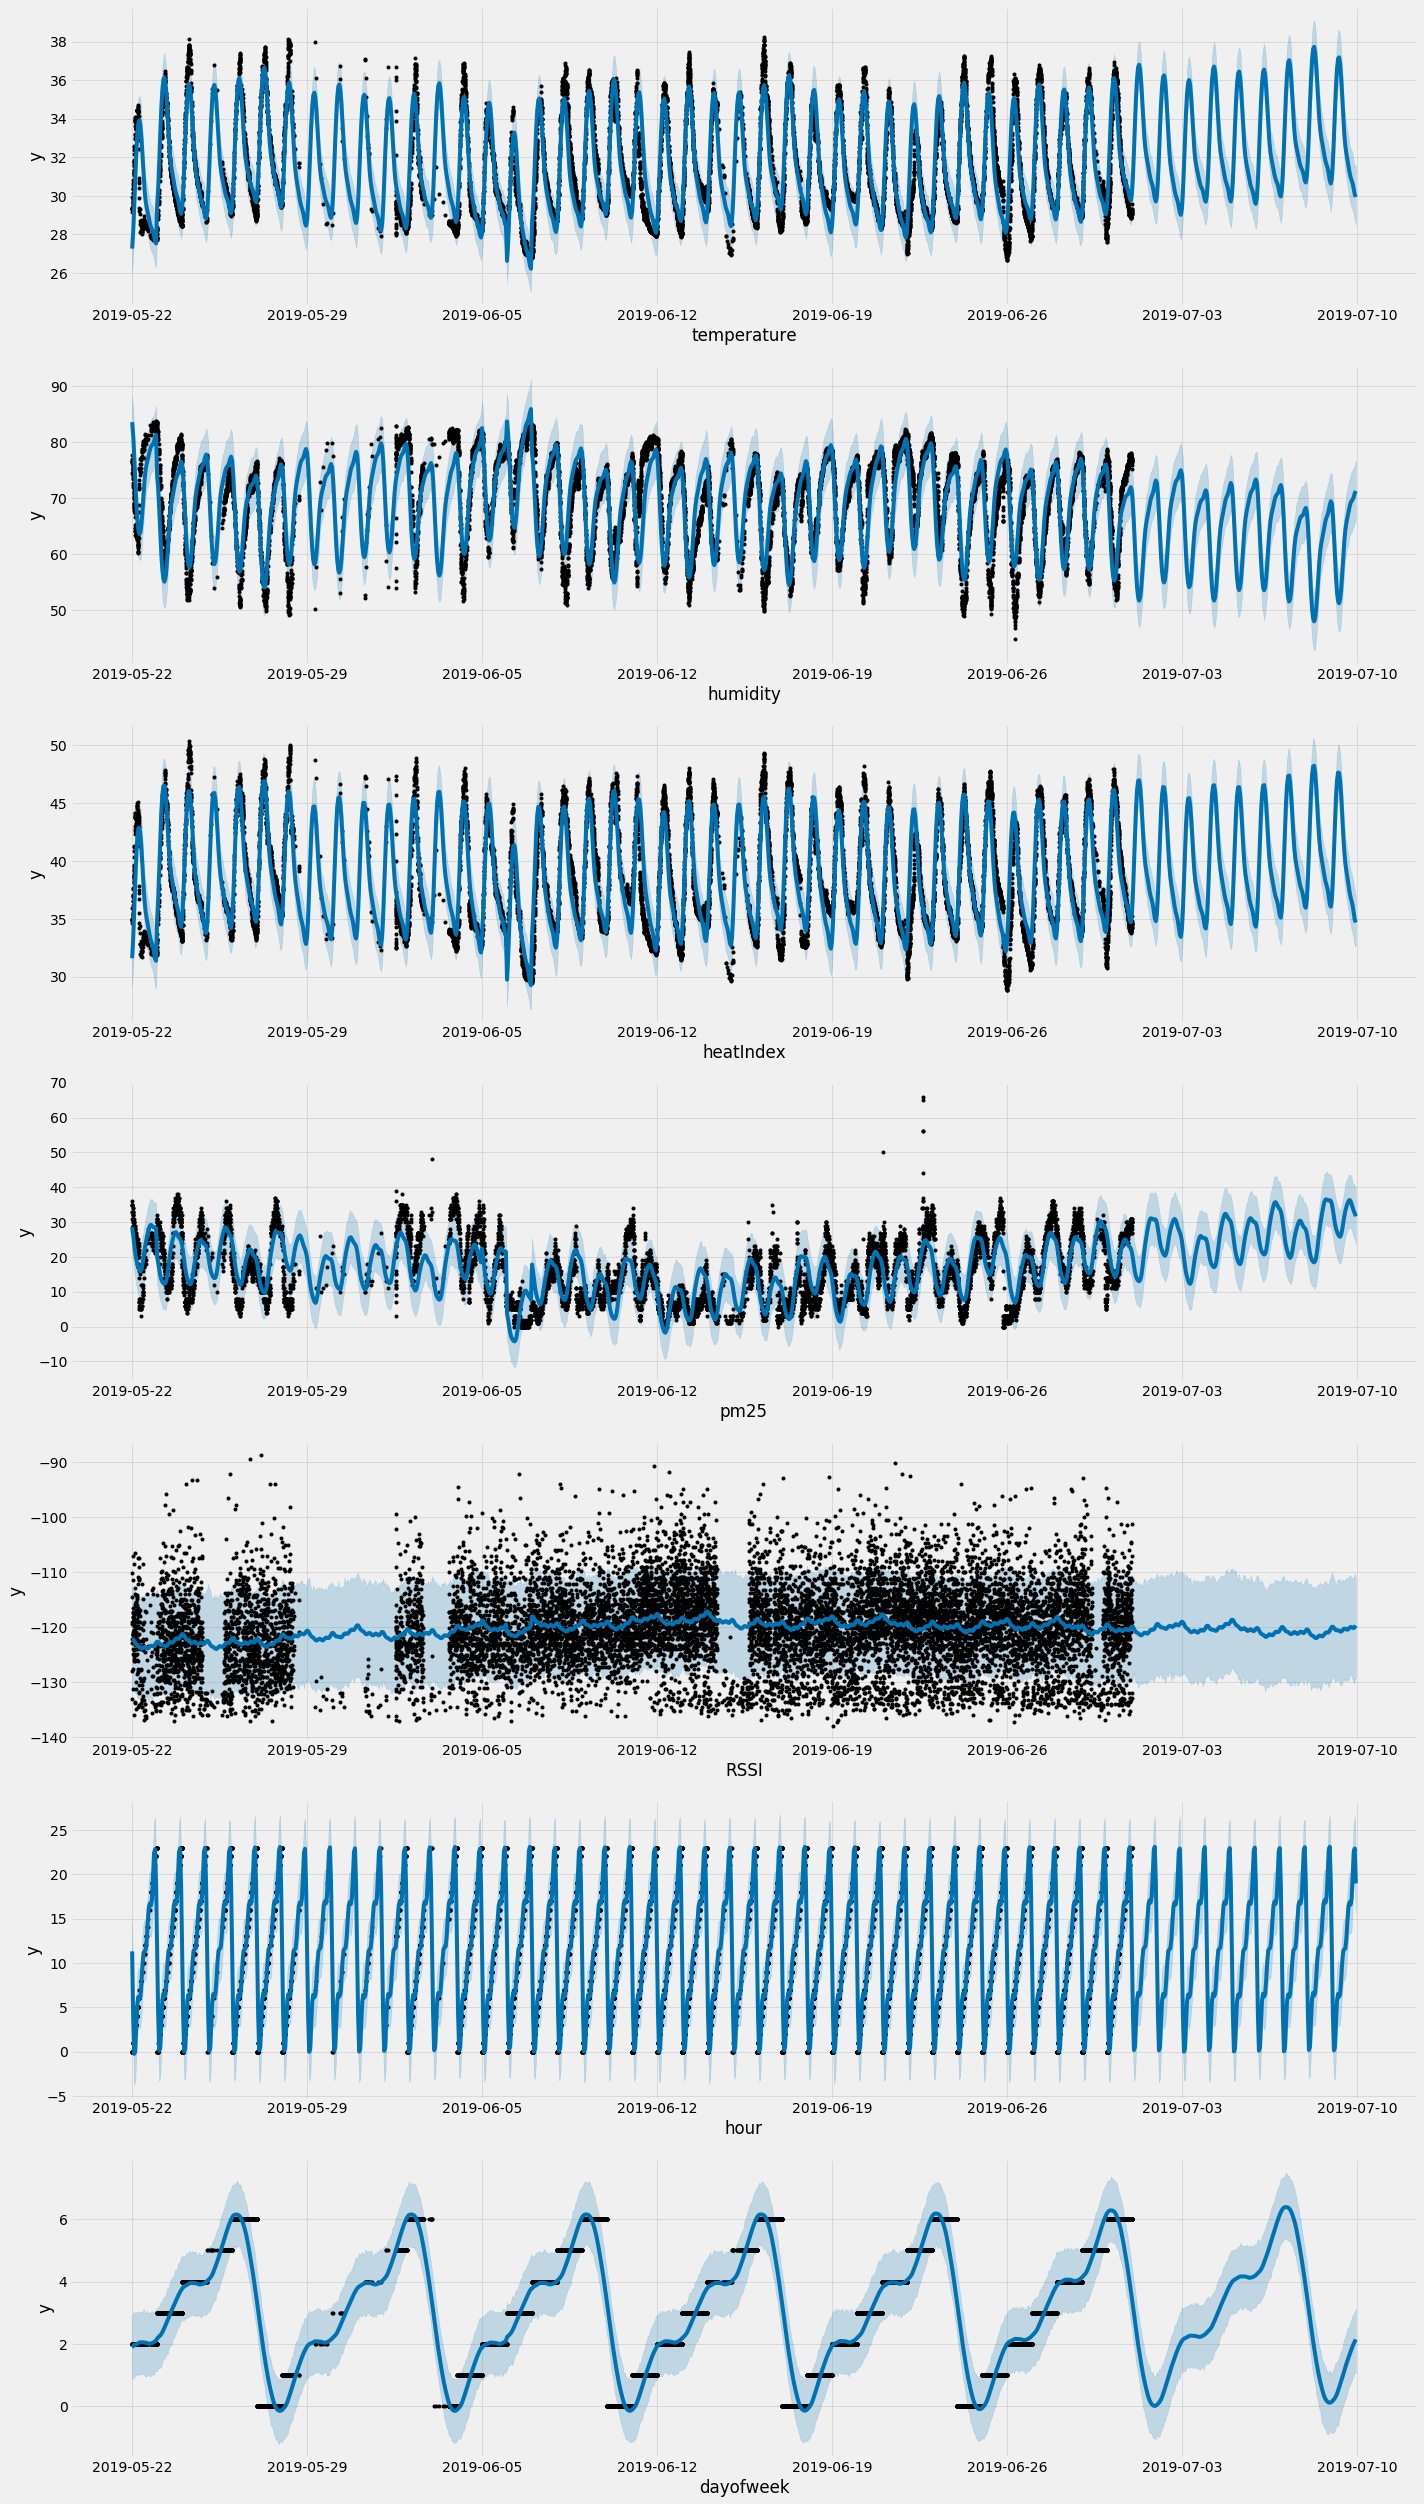

In [0]:
fig, axes = plt.subplots(nrows=len(features), figsize=(20, 5 * len(features)))

for i, k in enumerate(models.keys()):
  preds = models[k].predict(pd.DataFrame(future_preds, columns=['ds']))
  models[k].plot(preds, ax=axes[i], xlabel=k)